In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Given data:

z=np.asmatrix(np.asarray([0.11,0.12,0.15,0.17,0.16,0.19,0.17])).T
dist=(np.asarray([0,10,20,30,40,50,60]))

In [4]:
#Categorized data

cat=[0,1]

z_cat=np.where(z>=0.15,cat[0],cat[1]) 
z_cat

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [5]:
#Global mean for categorized data

pk1=np.sum(z_cat==1)/len(z_cat)
pk0=1-pk1

pk0*(1-pk0)

0.20408163265306123

In [6]:
#Probabilities of each categories at known points (hard data)

P0,P1=[],[]
for i in range(0,len(z_cat)):
    P0=np.append(P0,np.where(z_cat[i]==cat[0],0,1))
    P1=np.append(P1,np.where(z_cat[i]==cat[1],0,1))
    
P0,P1
P0=np.matrix(P0).T
P1=np.matrix(P1).T

    
P0,P1

(matrix([[1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 matrix([[0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]))

In [7]:
n_points=z_cat.shape[0]
ones_vec=np.asmatrix(np.ones(n_points))

In [8]:
#Calculating the experimental variogram for cat. 0:
n_lags=6
Evar0=np.zeros(n_lags)
for l in range(0,n_lags):
    lags=l+1
    Nh=len(P0[lags:])
    Evar0[l]=(1/(2*Nh))*np.sum(np.power((P0[lags:,0]-P0[:-lags,0]),2))
    
Evar0

array([0.08333333, 0.2       , 0.25      , 0.33333333, 0.5       ,
       0.5       ])

In [9]:
#Calculating the experimental variogram for cat. 1:
n_lags=6
Evar1=np.zeros(n_lags)
for l in range(0,n_lags):
    lags=l+1
    Nh=len(P1[lags:])
    Evar1[l]=(1/(2*Nh))*np.sum(np.power((P1[lags:,0]-P1[:-lags,0]),2))
    
Evar1

array([0.08333333, 0.2       , 0.25      , 0.33333333, 0.5       ,
       0.5       ])

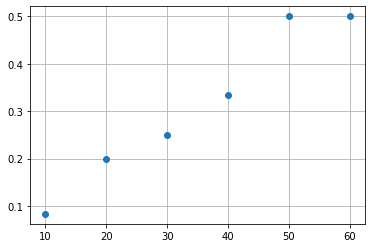

In [10]:
# plt.plot(dist[1:],Evar0,'*')
plt.plot(dist[1:],Evar1,'o')
# plt.plot(dist[1:],Evar1,'o')
plt.grid()
# plt.ylim([0,1.1*max(Evar0)])

In [11]:
def gass_var(h, a, c, n):
    gamma = c*(1-np.exp(-3*np.power(h/a,2)))+n
    return gamma

In [61]:
nugget=0.08
rang=40
sill=0.2
gamma_gass=gass_var(dist[1:],rang,sill,nugget)
gamma_gass

array([0.11419418, 0.18552669, 0.24300372, 0.27004259, 0.27815806,
       0.27976582])

Text(0.5, 1.0, 'Spherical model')

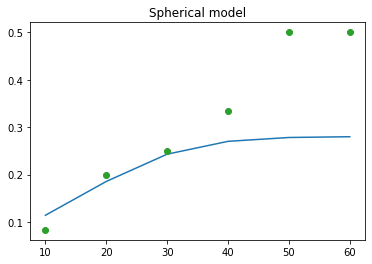

In [62]:
plt.plot(dist[1:], gamma_gass)
plt.plot(dist[1:],Evar0,'*')
plt.plot(dist[1:],Evar1,'o')
plt.title("Spherical model")

**At 15m:**

In [63]:
P15_0=np.asmatrix(np.asarray(P0[0:3])) # - known porosity values around 15m for cat.1
P15_1=np.asmatrix(np.asarray(P1[0:3])) # - known porosity values around 15m for cat.2
u15=np.asmatrix(np.asarray(dist[0:3])).T # - distance around 15m
uo_15=15

P15_0,P15_1

(matrix([[1.],
         [1.],
         [0.]]),
 matrix([[0.],
         [0.],
         [1.]]))

In [64]:
n_points=z_cat[0:3].shape[0]
ones_vec=np.asmatrix(np.ones(n_points))

In [65]:
u15_mat=u15*ones_vec

In [66]:
dist15=np.sqrt(np.power(u15_mat-u15_mat.T,2)) # - distance matrix between known values around 15m
dist_o15=np.sqrt(np.power(u15-uo_15,2)) # - distance matrix between unknown values around 15m

In [67]:
gamma_i15=gass_var(dist15,rang,sill,nugget)
gamma_i15

matrix([[0.08      , 0.11419418, 0.18552669],
        [0.11419418, 0.08      , 0.11419418],
        [0.18552669, 0.11419418, 0.08      ]])

In [68]:
gamma_o15=gass_var(dist_o15,rang,sill,nugget)
gamma_o15

matrix([[0.1488368 ],
        [0.08915867],
        [0.08915867]])

In [69]:
C15 = sill-gamma_i15
Co15 = sill-gamma_o15

In [70]:
lamb15=np.linalg.inv(C15)*Co15
lamb15

matrix([[-0.13438383],
        [ 0.71148087],
        [ 0.43114259]])

In [100]:
prob15_0=sum(np.dot(lamb15.T,P15_0))+(np.dot(1-sum(lamb15),pk0))
prob15_1=sum(np.dot(lamb15.T,P15_1))+(np.dot(1-sum(lamb15),pk1))

sigma15=sill-lamb15.T*Co15 

#Check
prob15_0+prob15_1==1

# Correct

if prob25_0<0:
    prob25_0=0
if prob25_0>1:
    prob25_0=1
if prob25_1<0:
    prob25_1=0
if prob25_1>1:
    prob25_1=1

prob15_0_corr=prob15_0/(prob15_0+prob15_1)
prob15_1_corr=prob15_1/(prob15_0+prob15_1)

prob15_0_corr,prob15_1_corr

(matrix([[0.57121159]]), matrix([[0.42878841]]))

In [72]:
print('Estimated probability for Cat.0:', prob15_0)
print('Estimated probability for Cat.1:', prob15_1)
print('Estimated error variance:', round(sigma15[0,0],4))

Estimated probability for Cat.0: [[0.57121159]]
Estimated probability for Cat.1: [[0.42878841]]
Estimated error variance: 0.0802


In [73]:
n_samples=200
prn=np.random.random(n_samples)

In [74]:
real=np.zeros(n_samples)

In [75]:
for n in range(0,n_samples):
    if prn[n]<=prob15_0:
        real[n]=cat[0]
    else:
        real[n]=cat[1]
print(real)  

[1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1.]


In [76]:
from collections import Counter

count = Counter(real)
b=count.most_common(1) #Return an array of the n most common elements and their counts from the most common to the least

E15=b[0][0]
print('Estimated category at 15m:', round(int(E15)))

Estimated category at 15m: 0


**At 25m:**

In [101]:
P25_0=np.asmatrix(np.asarray(P0[1:4])) # - known porosity values around 15m for cat.1
P25_1=np.asmatrix(np.asarray(P1[1:4])) # - known porosity values around 15m for cat.2
u25=np.asmatrix(np.asarray(dist[1:4])).T # - distance around 15m
uo_25=25

In [102]:
n_points=z_cat[1:4].shape[0]
ones_vec=np.asmatrix(np.ones(n_points))

In [103]:
u25_mat=u25*ones_vec

In [104]:
dist25=np.sqrt(np.power(u25_mat-u25_mat.T,2)) # - distance matrix between known values around 15m
dist_o25=np.sqrt(np.power(u25-uo_25,2)) # - distance matrix between unknown values around 15m

In [105]:
gamma_i25=gass_var(dist25,rang,sill,nugget)
gamma_i25

matrix([[0.08      , 0.11419418, 0.18552669],
        [0.11419418, 0.08      , 0.11419418],
        [0.18552669, 0.11419418, 0.08      ]])

In [106]:
gamma_o25=gass_var(dist_o25,rang,sill,nugget)
gamma_o25

matrix([[0.1488368 ],
        [0.08915867],
        [0.08915867]])

In [107]:
C25 = sill-gamma_i25
Co25 = sill-gamma_o25

In [108]:
lamb25=np.linalg.inv(C25)*Co25
lamb25

matrix([[-0.13438383],
        [ 0.71148087],
        [ 0.43114259]])

In [109]:
prob25_0=sum(np.dot(lamb25.T,P25_0))+(np.dot(1-sum(lamb25),pk0))
prob25_1=sum(np.dot(lamb25.T,P25_1))+(np.dot(1-sum(lamb25),pk1))

sigma25=sill-lamb25.T*Co25 

# Correct

if prob25_0<0:
    prob25_0=0
if prob25_0>1:
    prob25_0=1
if prob25_1<0:
    prob25_1=0
if prob25_1>1:
    prob25_1=1


prob25_0_corr=prob25_0/(prob25_0+prob25_1)
prob25_1_corr=prob25_1/(prob25_0+prob25_1)

#Check
prob25_0_corr+prob25_1_corr==1

True

In [110]:
(np.dot(1-sum(lamb25),pk1))

matrix([[-0.00235418]])

In [111]:
print('Estimated probability for Cat.0:', prob25_0_corr)
print('Estimated probability for Cat.1:', prob25_1_corr)
print('Estimated error variance:', round(sigma25[0,0],4))

Estimated probability for Cat.0: 0.0
Estimated probability for Cat.1: 1.0
Estimated error variance: 0.0802


In [112]:
n_samples=200
prn=np.random.random(n_samples)

In [113]:
real=np.zeros(n_samples)

In [114]:
for n in range(0,n_samples):
    if prn[n]<=prob25_0:
        real[n]=cat[0]
    else:
        real[n]=cat[1]
print(real) 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [115]:
from collections import Counter

count = Counter(real)
b=count.most_common(1) #Return an array of the n most common elements and their counts from the most common to the least

E25=b[0][0]
print('Estimated category at 25m:', round(int(E25)))

Estimated category at 25m: 1
